In [1]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [2]:
import xml.etree.ElementTree as ET
from lxml import etree
import pandas as pd

xml_data = '/path/user_agents.xml'

def xml2df(xml_data):
    tree = ET.parse(xml_data)
    root = tree.getroot()
    all_records = []
    headers = []
    for i, child in enumerate(root):
        record = []
        for subchild in child:
            record.append(subchild.text)
            if subchild.tag not in headers:
                headers.append(subchild.tag)
        all_records.append(record)
    return pd.DataFrame(all_records, columns=headers)

In [3]:
from xml.dom import minidom
import numpy as np
import pylab as pl
import re, fileinput
import os.path

# Input data
movieNames = ['After_The_Rain','Attitude_Matters','Barely_legal_stories','Between_Viewings','Big_Buck_Bunny','Chatter','Cloudland','Damaged_Kung_Fu','Decay','Elephant_s_Dream','First_Bite','Full_Service','Islands','Lesson_Learned','Norm','Nuclear_Family','On_time','Origami','Parafundit','Payload','Riding_The_Rails','Sintel','Spaceman','Superhero','Tears_of_Steel','The_room_of_franz_kafka','The_secret_number','To_Claire_From_Sonny','Wanted','You_Again']

pathfeatures  = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Discrete/features/"
pathlabels = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/MediaEval/annotations-org/"
pathrank = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Discrete/annotations/"
pathlist = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/"

pathcontinuous = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/ContinuousLIRIS-ACCEDE/"
pathcontfeatures = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/features-out/"

#ranksFile = '..\\annotations\\ACCEDEranking.txt'
databaseFilesXML = pathlist + 'ACCEDEdescription.xml'
movieFilesXML = pathlist + 'ACCEDEmovies.xml'
continuousAnnotationsFolder = pathcontinuous +'continuous-annotations/'

databasefiles= xml2df(databaseFilesXML)
moviefiles = xml2df(movieFilesXML)


    # Read databaseFilesXML
databaseXMLdoc = minidom.parse(databaseFilesXML)
idsList = databaseXMLdoc.getElementsByTagName('id')
movieFileList = databaseXMLdoc.getElementsByTagName('movie')
startFrameList = databaseXMLdoc.getElementsByTagName('start')
endFrameList = databaseXMLdoc.getElementsByTagName('end')
        
    # Read movieFilesXML
movieXMLdoc = minidom.parse(movieFilesXML)
moviesList = movieXMLdoc.getElementsByTagName('movie')
genresList = movieXMLdoc.getElementsByTagName('genre')
excerptsList = movieXMLdoc.getElementsByTagName('excerpts')
titleList = movieXMLdoc.getElementsByTagName('title')

animation = [ ['Big_Buck_Bunny',24],
                ['Elephant_s_Dream',24],
                ['Origami',24],
                ['Sintel',24]]

fpsMovie = [['After_The_Rain',23.976],
            ['Attitude_Matters',29.97],
            ['Barely_legal_stories',23.976],
            ['Between_Viewings',25],
            #['Big_Buck_Bunny',24],
            ['Chatter',24],
                ['Cloudland',25],
                ['Damaged_Kung_Fu',25],
                ['Decay',23.976],
                #['Elephant_s_Dream',24],
                ['First_Bite',25],
                ['Full_Service',29.97],
                ['Islands',23.976],
                ['Lesson_Learned',29.97],
                ['Norm',25],
                ['Nuclear_Family',23.976],
                ['On_time',30],
                #['Origami',24],
                ['Parafundit',24],
                ['Payload',25],
                ['Riding_The_Rails',23.976],
                #['Sintel',24],
                ['Spaceman',23.976],
                ['Superhero',29.97],
                ['Tears_of_Steel',24],
                ['The_room_of_franz_kafka',29.786],
                ['The_secret_number',23.976],
                ['To_Claire_From_Sonny',23.976],
                ['Wanted',25],
                ['You_Again',29.97]]

contmovies = pd.DataFrame(fpsMovie,columns=['name','fps'])
animovies = pd.DataFrame(animation,columns=['name','fps'])

In [4]:
contmovies.head()

,name,fps
0,After_The_Rain,23.976
1,Attitude_Matters,29.970
2,Barely_legal_stories,23.976
3,Between_Viewings,25.000
4,Chatter,24.000


In [5]:
animovies

,name,fps
0,Big_Buck_Bunny,24
1,Elephant_s_Dream,24
2,Origami,24
3,Sintel,24


In [6]:
def getFeatDf24(movname):
    fname = mov +'.mp4continous_features.txt'
    contfeatures = np.genfromtxt( os.path.join(pathcontfeatures,fname))
    cols = ['a','b','c','d','e','f','g','h','i','j']
    tmp = pd.DataFrame(contfeatures,columns=cols)
    df = tmp[tmp['a'] % 24 == 1]
    df.index= range(len(df))                             
    return df

#def getFeatDf(movname,anilist=animovies):
def getFeatDf(movname,anilist):
    featdict=getFeatDict(anilist)
    pdf = pd.DataFrame(featdict[movname])
    df = pdf[pdf[0] % 24 == 1]
    df.index= range(len(df))
    return df[[1,2,3,4,5,6,7,8,9]]
     
def getFeatDict(mlist):
    featdict={}
    for mov in mlist.name.values:
        fname = mov +'.mp4continous_features.txt'
        contfeatures = np.genfromtxt( os.path.join(pathcontfeatures,fname))
        featdict[mov]= contfeatures
    
    return featdict

In [10]:
#len(getFeatDict(contmovies))

In [11]:
#[len(getFeatDict(contmovies)[i]) for i in contmovies.name]

In [12]:
#[len(getFeatDict(animovies)[i]) for i in animovies.name]

In [7]:
featdict = getFeatDict(contmovies)
attmat = pd.DataFrame(featdict['Attitude_Matters'])
attmat[:5]

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,0.0000,0.0000,1.0000,1.00000,1.00000,1.0000,1.0,127.0000
1,13.0,1.0,0.0000,0.0000,1.0000,1.00000,1.00000,1.0000,1.0,0.0000
2,30.0,18.0,13.5949,91.8686,51.7026,5.14306,4.96333,51.7020,1.0,91.9129
3,42.0,25.0,24.2543,189.4990,69.1867,6.37832,6.81622,69.1820,5.0,19.4046
4,59.0,18.0,26.8603,159.7280,39.2209,9.49708,9.96642,39.1804,2.0,10.1264


In [8]:
featdict = getFeatDict(animovies)
bigbuck = pd.DataFrame(featdict['Big_Buck_Bunny'])
bigbuck[:5]

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0,255.0000
1,13.0,10.0,31.1714,49.9307,11.2120,9.46465,11.2120,10.7009,11.0,38.1039
2,25.0,49.0,37.9797,29.2186,52.0598,47.20580,49.0812,50.6926,50.0,34.8987
3,37.0,113.0,71.3440,31.2216,121.2940,109.98500,111.4500,117.8280,114.0,154.9670
4,49.0,202.0,79.5824,32.3916,217.8050,197.11500,198.1480,211.5800,205.0,246.3880


In [15]:
df = bigbuck[bigbuck[0] % 24 == 1]
df.index= range(len(df))   
df[:5]

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,255.0000
1,25.0,49.0,37.9797,29.2186,52.0598,47.2058,49.0812,50.6926,50.0,34.8987
2,49.0,202.0,79.5824,32.3916,217.8050,197.1150,198.1480,211.5800,205.0,246.3880
3,73.0,215.0,79.0470,35.3685,233.6940,209.1970,211.5380,226.4840,222.0,19.1684
4,97.0,207.0,73.5912,40.8068,226.3820,199.5830,204.4800,217.2820,220.0,29.3944


In [16]:
#getFeatDf('Big_Buck_Bunny')

In [17]:
#cols = ['a','b','c','d','e','f','g','h','i','j']
#ttt = pd.DataFrame(featdict['Big_Buck_Bunny'])
#aaa = getFeatDf24('Big_Buck_Bunny')
#aaa[:15]

In [18]:
databasefiles[0:5]

,id,name,license,movie,start,end
0,0,ACCEDE00000.mp4,20 Mississippi shared under Creative Commons A...,20_Mississippi.mp4,833,1094
1,1,ACCEDE00001.mp4,20 Mississippi shared under Creative Commons A...,20_Mississippi.mp4,6571,6789
2,2,ACCEDE00002.mp4,20 Mississippi shared under Creative Commons A...,20_Mississippi.mp4,47879,48102
3,3,ACCEDE00003.mp4,20 Mississippi shared under Creative Commons A...,20_Mississippi.mp4,48156,48402
4,4,ACCEDE00004.mp4,20 Mississippi shared under Creative Commons A...,20_Mississippi.mp4,48467,48727


In [19]:
moviefiles[-5:]

,movie,title,license,credits,genre,language,length,excerpts
155,Viaje_a_la_tierra_del_Quebracho.mp4,Viaje a la tierra del Quebracho,Viaje a la tierra del Quebracho shared under C...,TEMBE Cooperativa,Animation,Silent,00:11:53,30
156,Waldo_the_Dog.mp4,Waldo the Dog,Waldo the Dog shared under Creative Commons At...,Kris Canonizado,Romance,English,02:00:39,36
157,Wanted.mp4,Wanted,Wanted shared under Creative Commons Attributi...,Ezel Domanic,Comedy,Silent,00:01:57,4
158,When_Rabbits_Fly.mp4,When Rabbits Fly,When Rabbits Fly shared under Creative Commons...,Helgi Johannsson,Drama,Icelandic,00:28:18,39
159,You_Again.mp4,You Again,You Again shared under Creative Commons Attrib...,Lauren Teng,Romance,English,00:14:30,53


In [20]:
#ff = list(animovies.name +'.mp4continous_features.txt')
#for mov in animovies.name:
#    print mov +'.mp4continous_features.txt'
#moviefiles['genre']
#g = moviefiles[ moviefiles['movie'] == filename ]['genre']
#pathmovies  = pathcontinuous + "continous-movies"

In [9]:
def getDf(movname):
    arousalfilename = os.path.join(continuousAnnotationsFolder, movname + '_Arousal.txt')
    valencefilename = os.path.join(continuousAnnotationsFolder, movname + '_Valence.txt')
    
    movArousal = np.genfromtxt(arousalfilename, names=True, delimiter='\t', dtype=None)
    movValence = np.genfromtxt(valencefilename, names=True, delimiter='\t', dtype=None)
    
    ardf = pd.DataFrame(movArousal)
    valdf = pd.DataFrame(movValence) 

    return ardf, valdf

def getDfs(movname):
    arousalfilename = os.path.join(continuousAnnotationsFolder, movname + '_Arousal.txt')
    valencefilename = os.path.join(continuousAnnotationsFolder, movname + '_Valence.txt')
    
    movArousal = np.genfromtxt(arousalfilename, names=True, delimiter='\t', dtype=None)
    movValence = np.genfromtxt(valencefilename, names=True, delimiter='\t', dtype=None)
    
    ardf = pd.DataFrame(movArousal)
    valdf = pd.DataFrame(movValence)
    
    return ardf,valdf

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data

def displayMovieAVanot(movname,col='b'):
    #plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(figsize=(10,10))
    ardf, valdf = getDf(movname)
    for i in range(len(ardf)):
        xy = (valdf.Mean[i], ardf.Mean[i])
        ax.plot(xy[0], xy[1], "ob")
        #plt.scatter(valdf.Mean[0:minin],ardf.Mean[0:minin],color=col,label=movname)

        # Annotate the 1st position with another text box ('Test')
        offsetbox = TextArea(str(ardf.Time[i]), minimumdescent=False)

        ab = AnnotationBbox(offsetbox, xy,
                        xybox=(-20, 40),
                        xycoords='data',
                        boxcoords="offset points",
                        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=90,rad=3")
                    )
        if (i%10 == 0):
            ax.add_artist(ab)
        # Fix the display limits to see everything
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.grid()

    plt.show()

    

In [11]:
from skimage import io
import os
def displayMovieAVimg(movname,col='b'):
    #plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(figsize=(10,10))
    ardf, valdf = getDf(movname)
    movpath = '/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/bigbuckbuny/'
    
    for i in range(len(ardf)):
        filename = os.path.join(movpath, 'bbb0322.jpeg')
        arr_img = io.imread(filename)
        #arr_img.resize(0.25,0.25)
        #arr_img = plt.imread(fn, format='jpeg')
        
        xy = (valdf.Mean[i], ardf.Mean[i])
        ax.plot(xy[0], xy[1], "ob")
        #plt.scatter(valdf.Mean[0:minin],ardf.Mean[0:minin],color=col,label=movname)

        # Annotate the 2nd position with another image (a Grace Hopper portrait)
        #fn = get_sample_data("grace_hopper.png", asfileobj=False)
        #arr_img = plt.imread(fn, format='png')

        imagebox = OffsetImage(arr_img, zoom=0.2)
        imagebox.image.axes = ax

        ab = AnnotationBbox(imagebox, xy,
                        xybox=(120., -80.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        arrowprops=dict(
                            arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )
        
        if (i%10 == 0):
            ax.add_artist(ab)
        # Fix the display limits to see everything
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.grid()

    plt.show()

In [25]:
#len(getDf('Big_Buck_Bunny')[0])
#/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/bigbuckbuny

In [26]:
#displayMovieAVimg('Big_Buck_Bunny')

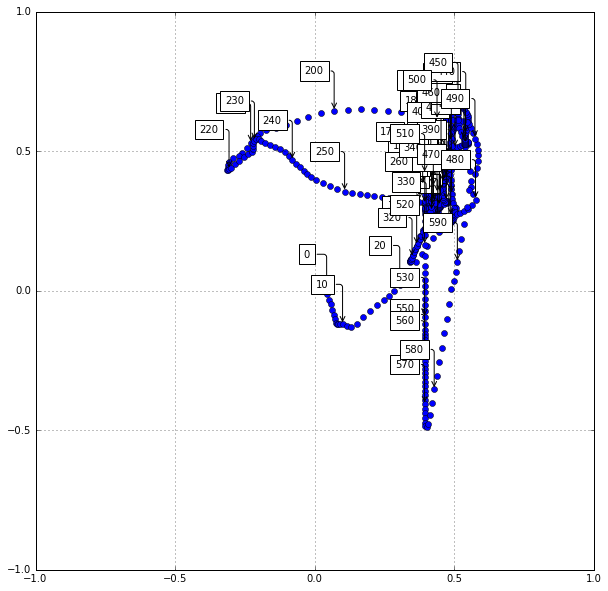

In [12]:
displayMovieAVanot('Big_Buck_Bunny')

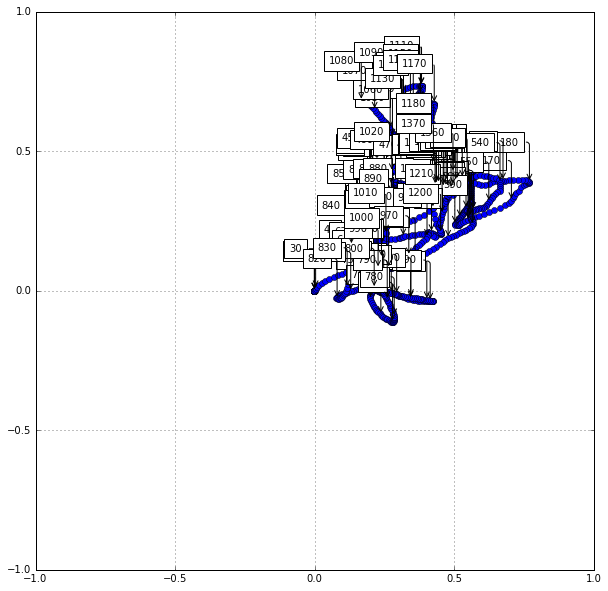

In [28]:
displayMovieAVanot('Attitude_Matters')

In [13]:
%matplotlib inline
import pandas as pd
from sklearn import preprocessing

def getRGB(moviename,movielist):
    featdict = getFeatDict(movielist)
    df = pd.DataFrame(featdict[moviename])
    df.columns = ['time','framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']
    rgb = df[['redmean','greenmean','bluemean']]
    return rgb

# get stardardize mean=0, std=1 scaled
# return type numpy.ndarray
def getStd(df):
    std_scaler = preprocessing.StandardScaler()
    return std_scaler.fit_transform(df)

#get the values scaled btw (0,1)
# return type numpy.ndarray
def getNormalized(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    return min_max_scaler.fit_transform(df)

# get stardardize mean=0, std=1 scaled
# return type dataframe
def getStd2(df):
    return ((df - df.mean()) / df.std())

#get the values scaled btw (0,1)
# return type dataframe
def getNormalized2(df):
    return ((df-df.min()) / (df.max()-df.min()))
    

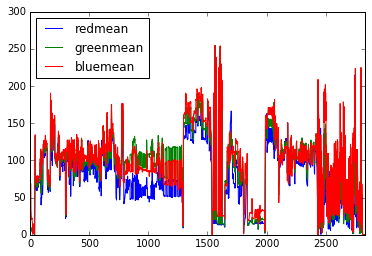

In [32]:
getRGB('Attitude_Matters',contmovies).plot()

In [33]:
a= getStd(getRGB('Attitude_Matters',contmovies))
b= getStd2(getRGB('Attitude_Matters',contmovies))
abs(a-b.values).mean()
# WHY ??

0.00013707131031697104

In [34]:
a= getNormalized(getRGB('Attitude_Matters',contmovies))
b= getNormalized2(getRGB('Attitude_Matters',contmovies))
abs(a-b.values).mean()

2.1360210647815111e-17

In [35]:
# pd.DataFrame(getStd2(getRGB('Attitude_Matters',contmovies))).plot()
# pd.DataFrame(getStd(getRGB('Attitude_Matters',contmovies))).plot()
# pd.DataFrame(getNormalized(getRGB('Attitude_Matters',contmovies))).plot()
# pd.DataFrame(getNormalized2(getRGB('Attitude_Matters',contmovies))).plot()

In [37]:
#for i in range(len(colordf)):
#    print colordf.loc[i].values

#clr = colors.rgb2hex((1.0, 0.0, 1.0)) 
#print type(colordf.loc[5].values)
#colornormfdf.loc[i]['redmean']

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.figure(figsize=(20,2))
for i in range(len(colormm_scaled)):
    clr = colors.rgb2hex(colormm_scaled[i]) 
    plt.scatter(i,0.5,s=np.pi*50,color=clr)


NameError: name 'colormm_scaled' is not defined

NameError: name 'colormm_scaled' is not defined

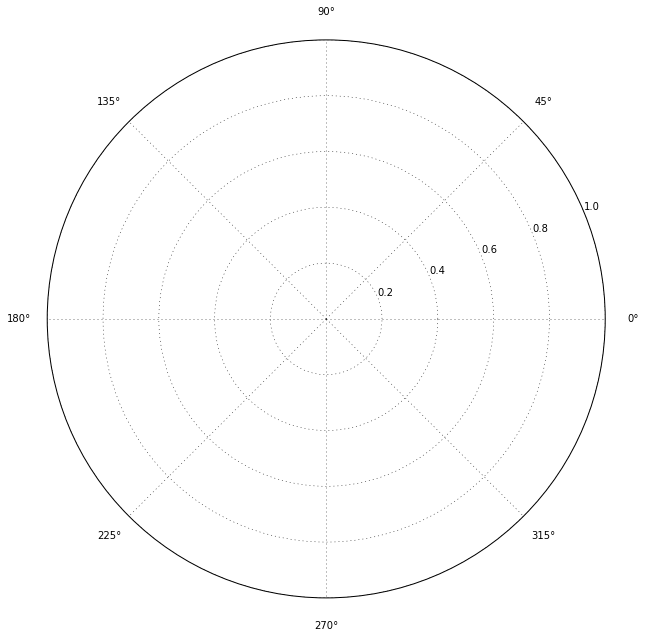

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(111,projection='polar')
for i in range(len(colormm_scaled)):
    clr = colors.rgb2hex(colormm_scaled[i]) 
    plt.scatter(i,0.4,s=np.pi*(9**2),color=clr)

plt.title(" vs ")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel("valence")
plt.ylabel("arousal")
plt.show()

In [16]:


def displayMovieAV(movname,col='b'):
    plt.figure(figsize=(10,10))  
    ardf, valdf = getDf(movname) 
    area = np.pi #* (15 * np.random.rand(N))**2  # 0 to 15 point radii
    plt.scatter(0, 0, s=area, c='#4c4c4c', alpha=0.5)
    clr = colors.rgb2hex(np.random.random(3))
    minin = min(len(valdf),len(ardf))-1
    plt.scatter(valdf.Mean[0:minin],ardf.Mean[0:minin],color=col,label=movname)
    
    plt.grid()
    plt.legend(loc='lower center', shadow=True, fontsize='x-large')
    plt.title("Valence vs Arousal")
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel("valence")
    plt.ylabel("arousal")
    plt.show()
    

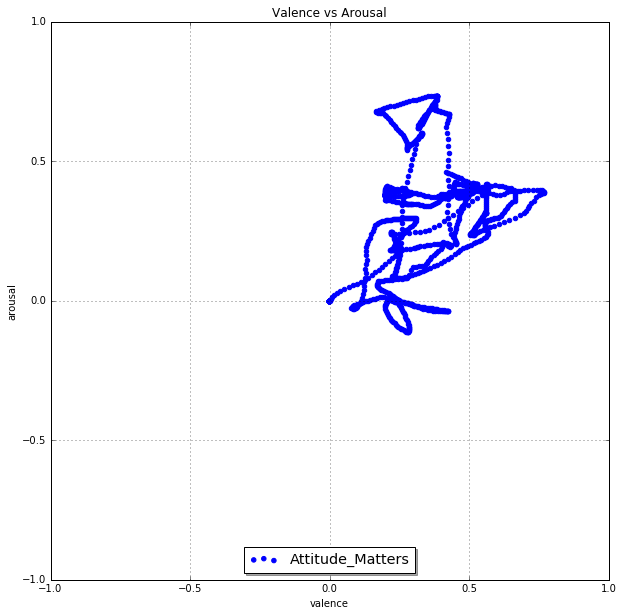

In [17]:
displayMovieAV('Attitude_Matters')

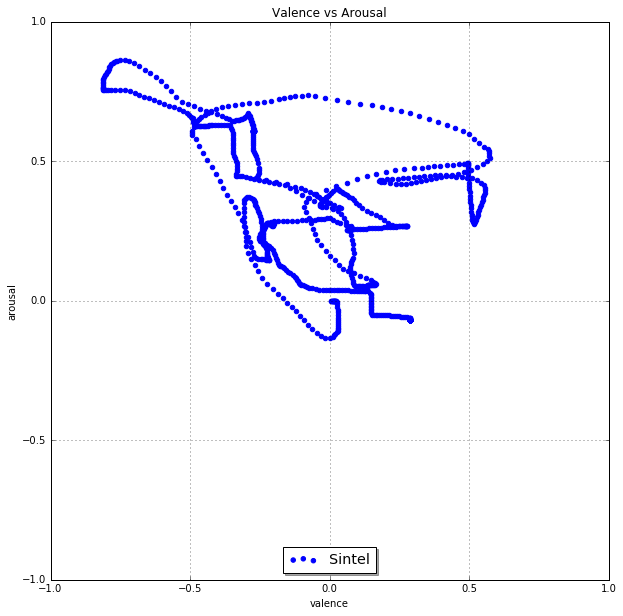

In [181]:
displayMovieAV('Sintel')

In [18]:
  
def plot3Df(movname,col='r'):
    plt.figure(figsize=(10,10))
    arousalfilename = os.path.join(continuousAnnotationsFolder, movname + '_Arousal.txt')
    valencefilename = os.path.join(continuousAnnotationsFolder, movname + '_Valence.txt')
    
    movArousal = np.genfromtxt(arousalfilename, names=True, delimiter='\t', dtype=None)
    movValence = np.genfromtxt(valencefilename, names=True, delimiter='\t', dtype=None)
    
    ardf = DataFrame(movArousal)
    valdf = DataFrame(movValence) 

    minin = min(len(valdf),len(ardf))-1
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    #plt.subplot(111,projection='3d')
    ax.grid()
    ax.scatter(valdf.Mean[0:minin],valdf.Time[0:minin],ardf.Mean[0:minin],c=col,marker='o')
    ax.set_xlabel("valence")
    ax.set_ylabel("time")
    ax.set_zlabel("arousal")
    ax.set_zlim([-1,1])
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,510])
    plt.title("Time vs Arousal & Valence Mean")
    plt.show()

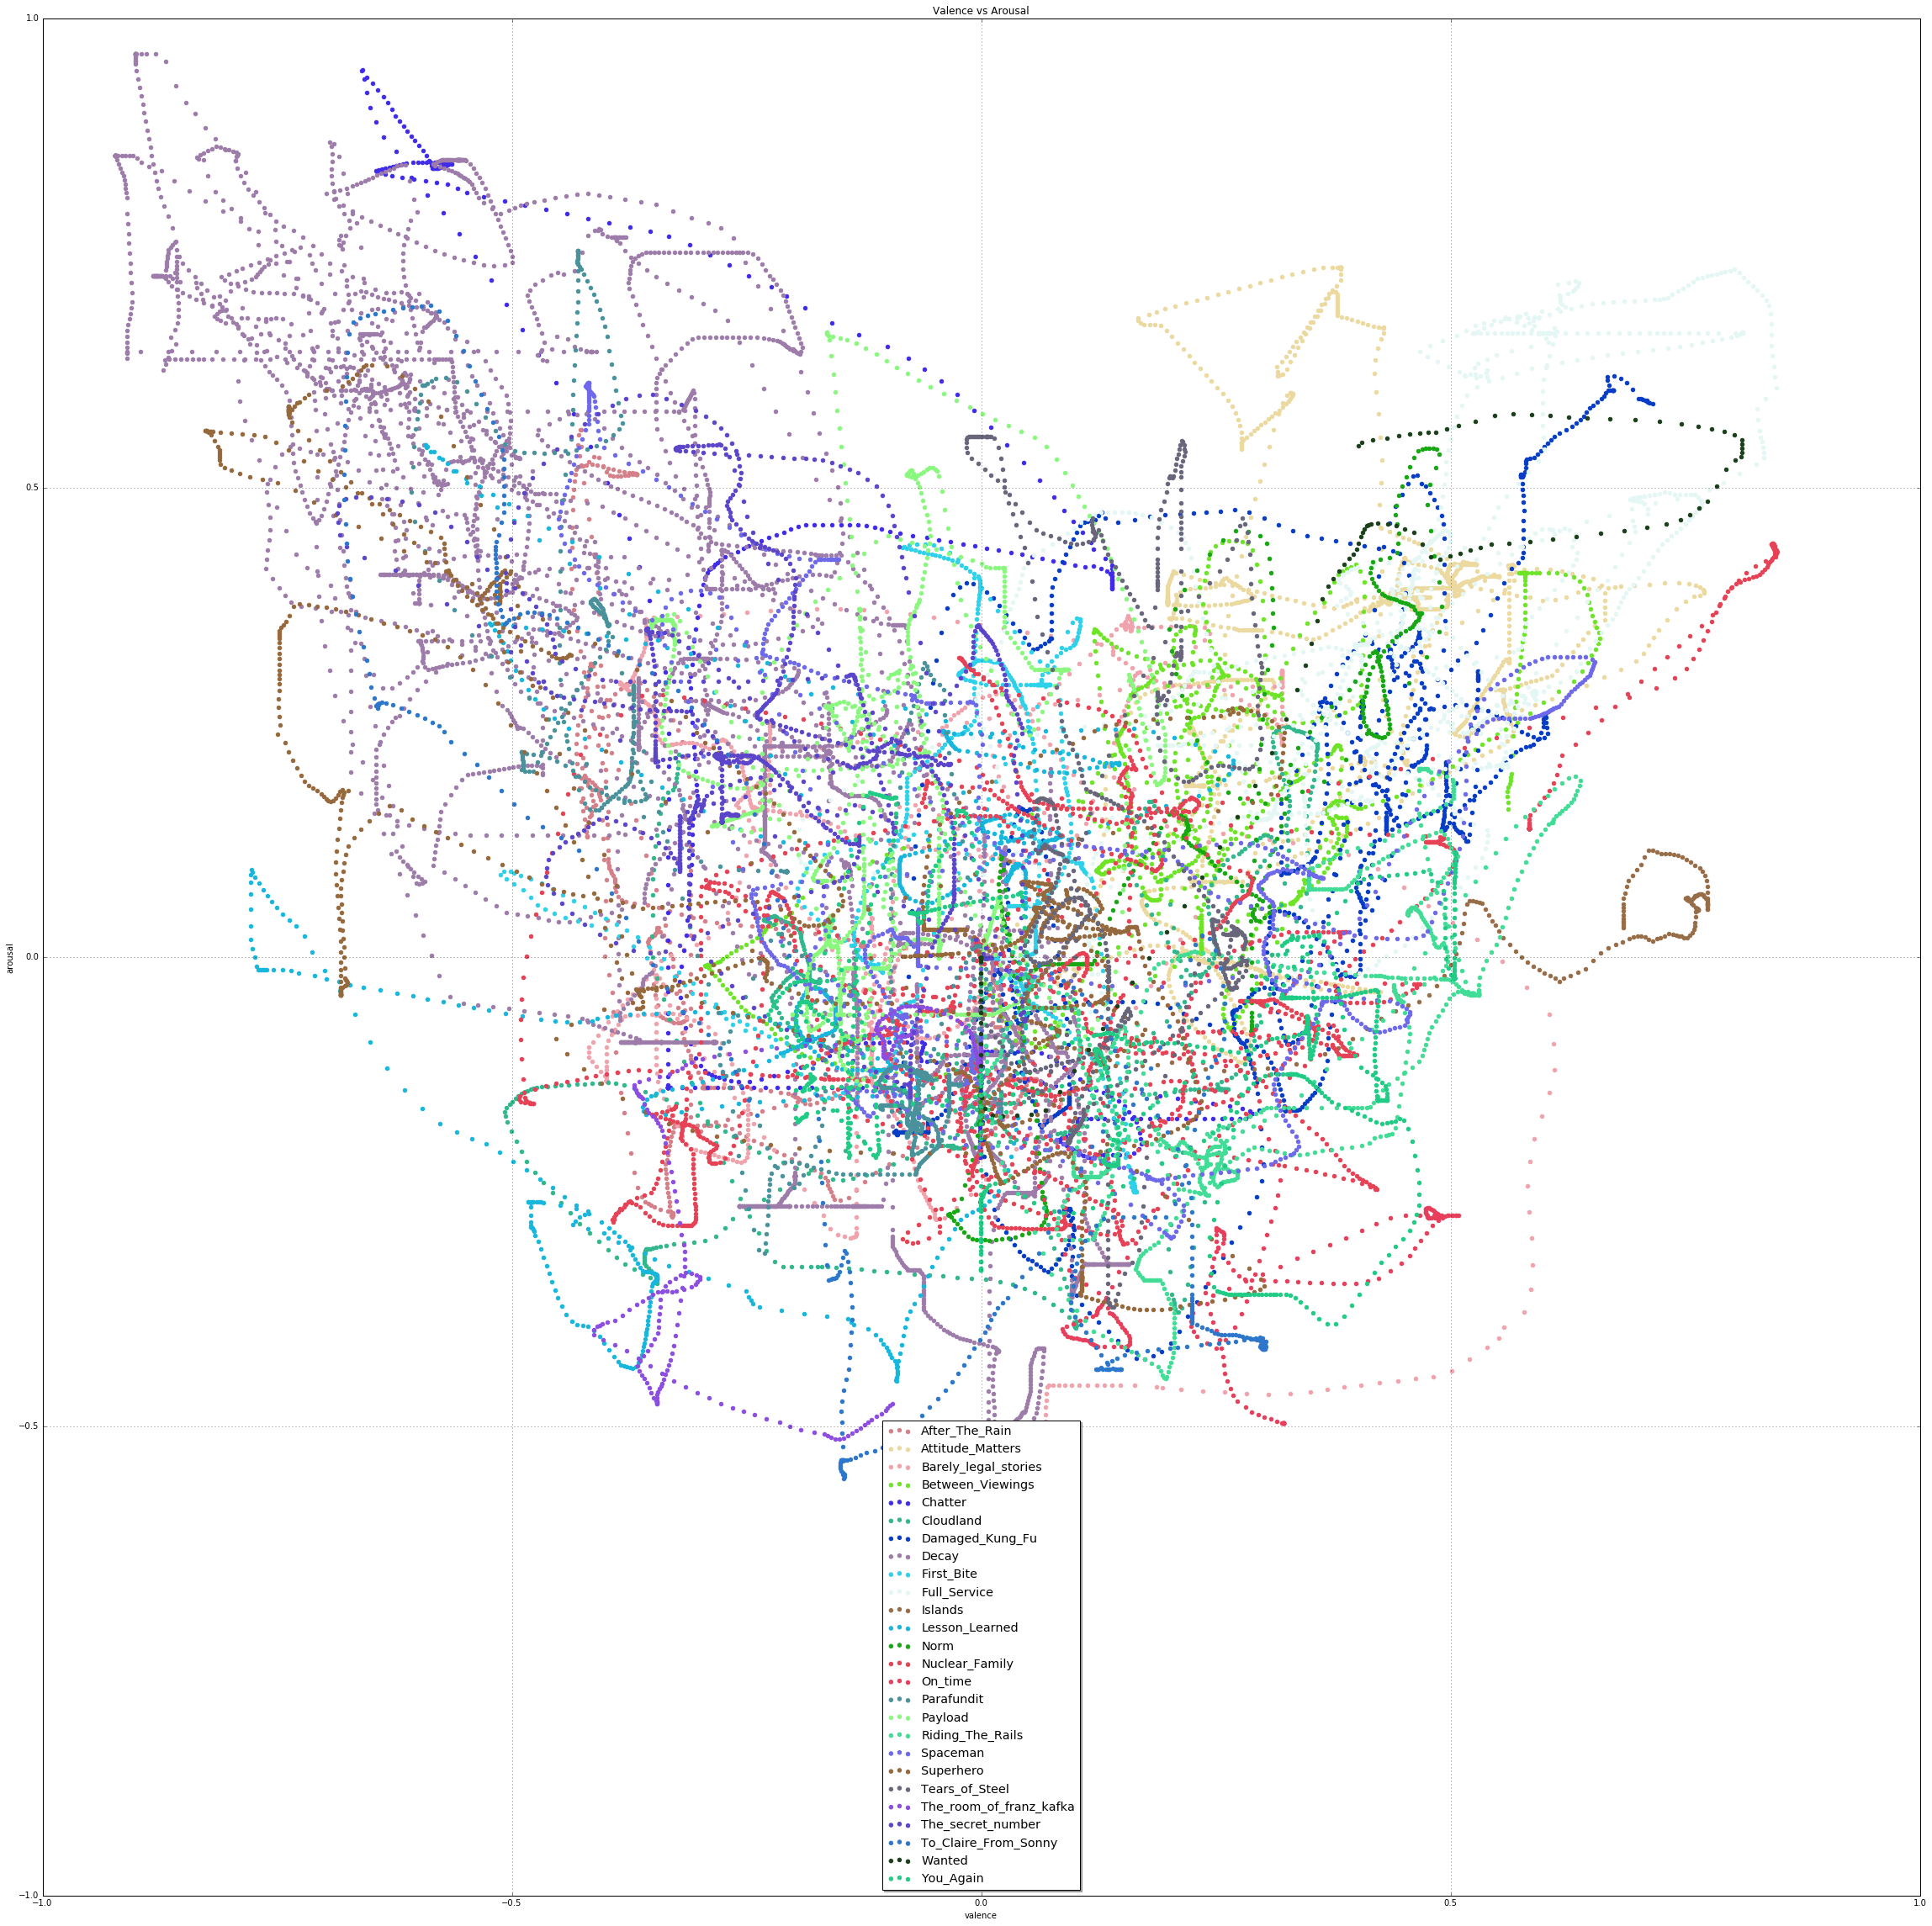

In [19]:
#Display all feature movies
plt.figure(figsize=(40,40))

i=0
for mov in fpsMovie:
    movname =mov[0]
    arousalfilename = os.path.join(continuousAnnotationsFolder, movname + '_Arousal.txt')
    valencefilename = os.path.join(continuousAnnotationsFolder, movname + '_Valence.txt')
    
    movArousal = np.genfromtxt(arousalfilename, names=True, delimiter='\t', dtype=None)
    movValence = np.genfromtxt(valencefilename, names=True, delimiter='\t', dtype=None)
    
    ardf = DataFrame(movArousal)
    valdf = DataFrame(movValence)
    clr = colors.rgb2hex(np.random.random(3))
    #clr = ['#899ff7','#9b5cfc','#78ce4e','#455307']
    minin = min(len(valdf),len(ardf))-1
    plt.scatter(valdf.Mean[0:minin],ardf.Mean[0:minin],color=clr,label=movname)
    i = i+1

plt.scatter(0,0,s=1,color='g')
plt.grid()
plt.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.title("Valence vs Arousal")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel("valence")
plt.ylabel("arousal")
plt.savefig(pathlist+"allfeature.png")
plt.show()

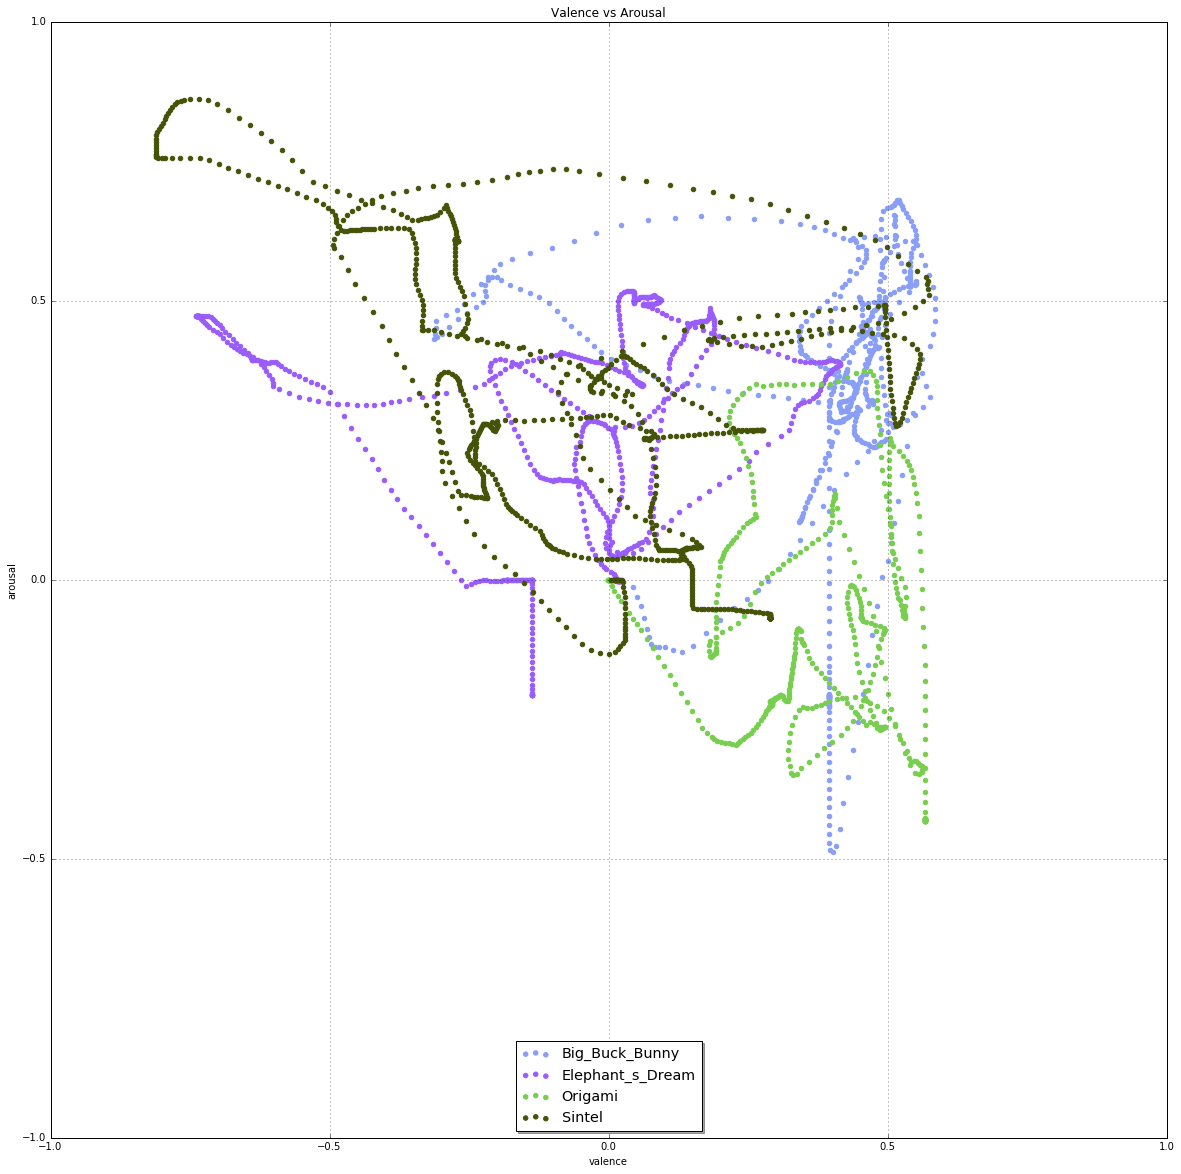

In [184]:
#Display all animation movies
plt.figure(figsize=(20,20))
#plt.subplot(111,projection='polar')

#for mov in fpsMovie[0:10]:
#for mov in fpsMovie:
i=0
for mov in animation:
    movname =mov[0]
    arousalfilename = os.path.join(continuousAnnotationsFolder, movname + '_Arousal.txt')
    valencefilename = os.path.join(continuousAnnotationsFolder, movname + '_Valence.txt')
    
    movArousal = np.genfromtxt(arousalfilename, names=True, delimiter='\t', dtype=None)
    movValence = np.genfromtxt(valencefilename, names=True, delimiter='\t', dtype=None)
    
    ardf = DataFrame(movArousal)
    valdf = DataFrame(movValence) 
    
    #clr = colors.rgb2hex((1.0, 0.0, 1.0)) 
    #clr = colors.rgb2hex(np.random.random(3))
    clr = ['#899ff7','#9b5cfc','#78ce4e','#455307']
    minin = min(len(valdf),len(ardf))-1
    plt.scatter(valdf.Mean[0:minin],ardf.Mean[0:minin],color=clr[i],label=movname)
    i = i+1

plt.scatter(0,0,s=1,color='g')
plt.grid()
plt.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.title("Valence vs Arousal")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel("valence")
plt.ylabel("arousal")
plt.savefig(pathlist+"allanimation.png")
plt.show()


In [185]:
# colors.rgb2hex(np.random.random(3))
# colors.rgb2hex((0.3, 0.3, 0.3)) 
# animovies
# moviefiles.genre[moviefiles.movie == 'Big_Buck_Bunny.mp4']

In [186]:
is_animation = moviefiles.genre == 'Animation'
anifiles = moviefiles[is_animation]
x = anifiles['movie'].str.replace('.mp4','')
x

57                  BEST_Directors_Cut
59                      Big_Buck_Bunny
78                    Elephant_s_Dream
88                       How_Fear_Came
107                            Origami
110                        Pennipotens
126                             Sintel
127               Sita_Sings_the_Blues
143      The_idea_by_berthold_bartosch
155    Viaje_a_la_tierra_del_Quebracho
Name: movie, dtype: object

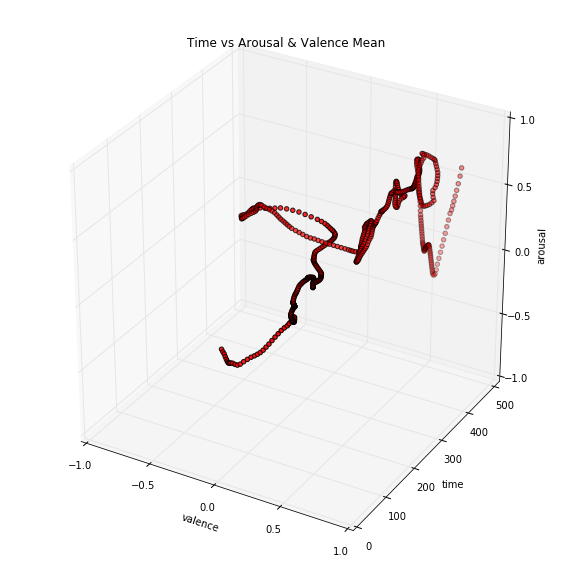

In [187]:
from mpl_toolkits.mplot3d import Axes3D
plot3Df('Big_Buck_Bunny')

In [188]:
ba, bv = getDf('Big_Buck_Bunny')

In [189]:
def bokehPlotAV(title,bv,ba):    
    from bokeh.plotting import figure, output_file, show

    output_file("title.html")

    p = figure(plot_width=800, plot_height=800, title=title)
    p.title.text_color = "olive"
    p.title.text_font = "times"
    p.title.text_font_style = "italic"

    p.circle(bv, ba, size=4)

    show(p)

In [190]:
bokehPlotAV('Big_Buck_Bunny',bv.Mean,ba.Mean)

In [52]:
#ba.ix[ba.Mean <=0.01 ]

In [53]:
import plotly
plotly.tools.set_credentials_file(username='yt', api_key='Gewb0ND5fblEBeo2ZsOq')

In [54]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

N = min(len(ba.Mean),len(bv.Mean))
trace = go.Scattergl(
    x = bv.Mean[0:N],
    y = ba.Mean[0:N],
    #z = bv.Time[0:N],
    mode = 'markers',
    marker = dict(
        color = 'FFBAD2',
        line = dict(width = 1)
    )
)
data = [trace]
py.iplot(data)

In [192]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import scipy
from scipy.stats import pearsonr

#cols = ['a','b','c','d','e','f','g','h','i','j']
#fdf.columns = cols
#fdf[:5]
#fdf = fdf[[1,2,3,4,5,6,7,8,9]]
#fdf[:5]
#x,y,y2 =  getDataXYY2(mlist[1])
#x,y,y2 =  getTrainData(mlist)

In [193]:
fdf = getFeatDf('Big_Buck_Bunny',animovies)
ba, bv = getDf('Big_Buck_Bunny')
minind = min([len(i) for i in [bv,ba,fdf]])
normfdf = (fdf - fdf.mean()) / fdf.std()

In [215]:
fdf.tail()

,1,2,3,4,5,6,7,8,9
592,189.0,93.1966,100.702,236.752,231.044,203.069,147.857,188.0,3.38321
593,189.0,93.1303,100.818,236.998,231.336,203.206,147.864,188.0,3.21530
594,189.0,93.1359,100.364,235.960,230.254,202.438,147.436,188.0,4.00493
595,188.0,93.0723,100.436,235.051,229.650,201.706,146.617,188.0,7.21575
596,188.0,92.6456,100.120,235.011,229.529,201.769,146.486,188.0,5.90582


In [216]:
ba.tail()

,Time,Mean,Std
592,592,0.187363,0.190124
593,593,0.239231,0.200132
594,594,0.298978,0.216756
595,595,0.362678,0.233334
596,596,0.428253,0.251734


In [217]:
bv.tail()

,Time,Mean,Std
593,593,0.535271,0.260640
594,594,0.545331,0.265653
595,595,0.553172,0.271297
596,596,0.556910,0.277979
597,597,0.561327,0.287247


In [218]:
fdf.head()

,1,2,3,4,5,6,7,8,9
0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,255.0000
1,49.0,37.9797,29.2186,52.0598,47.2058,49.0812,50.6926,50.0,34.8987
2,202.0,79.5824,32.3916,217.8050,197.1150,198.1480,211.5800,205.0,246.3880
3,215.0,79.0470,35.3685,233.6940,209.1970,211.5380,226.4840,222.0,19.1684
4,207.0,73.5912,40.8068,226.3820,199.5830,204.4800,217.2820,220.0,29.3944


In [201]:
fdf.describe()

,1,2,3,4,5,6,7,8,9
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,114.623116,59.388900,102.057464,134.043599,103.051203,121.529759,107.186769,111.061977,28.738230
std,46.133564,22.289056,35.927452,53.996400,55.093607,47.264044,46.286971,53.800257,45.273575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,45.724000,84.832200,96.255800,63.024400,88.284500,72.552400,69.000000,4.170350
50%,117.000000,57.758800,100.879000,135.371000,93.722500,125.067000,106.324000,108.000000,12.001400
75%,148.000000,75.980900,122.146000,167.990000,135.902000,158.215000,142.404000,156.000000,35.926500
max,215.000000,111.367000,211.572000,243.371000,239.342000,211.538000,226.484000,222.000000,255.000000


In [202]:
normfdf.describe()

,1,2,3,4,5,6,7,8,9
count,5.970000e+02,5.970000e+02,5.970000e+02,5.970000e+02,5.970000e+02,5.970000e+02,5.970000e+02,5.970000e+02,5.970000e+02
mean,-1.710896e-16,1.894260e-15,-2.018079e-15,1.372437e-16,1.012404e-15,5.489746e-16,-3.004111e-15,2.380378e-16,-3.338108e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.484593e+00,-2.664487e+00,-2.840654e+00,-2.482454e+00,-1.870475e+00,-2.571294e+00,-2.315701e+00,-2.064339e+00,-6.347683e-01
25%,-7.504973e-01,-6.130766e-01,-4.794457e-01,-6.998207e-01,-7.265236e-01,-7.033943e-01,-7.482531e-01,-7.818174e-01,-5.426539e-01
50%,5.152180e-02,-7.313453e-02,-3.280121e-02,2.458315e-02,-1.693246e-01,7.484001e-02,-1.863957e-02,-5.691379e-02,-3.696821e-01
75%,7.234838e-01,7.444012e-01,5.591417e-01,6.286790e-01,5.962724e-01,7.761765e-01,7.608454e-01,8.352753e-01,1.587741e-01
max,2.175789e+00,2.332001e+00,3.048213e+00,2.024716e+00,2.473804e+00,1.904370e+00,2.577339e+00,2.062035e+00,4.997656e+00


In [203]:
X = normfdf[0:minind]
Y = bv.Mean[0:minind]
Y2 = ba.Mean[0:minind]

In [204]:
def getDataNormXYY2(movname,mlist):
    fdf = getFeatDf(movname,mlist)
    ba, bv = getDf(movname)
    
    minind = min([len(i) for i in [bv,ba,fdf]])
    normfdf = (fdf - fdf.mean()) / fdf.std()
    
    X = normfdf[0:minind]
    Y = bv.Mean[0:minind]
    Y2 = ba.Mean[0:minind]
    return X,Y,Y2

def getDataXYY2(movname,mlist):
    fdf = getFeatDf(movname,mlist)
    ba, bv = getDf(movname)
    
    minind = min([len(i) for i in [bv,ba,fdf]])
    normfdf = (fdf - fdf.mean()) / fdf.std()
    
    X = fdf[0:minind]
    Y = bv.Mean[0:minind]
    Y2 = ba.Mean[0:minind]
    return X,Y,Y2

def getAllFeatureLabelData(movies,mlist):
    X,Y,Y2 =  getDataXYY2(movies[0],mlist)
    for mov in movies[1:]:
        x,v,a = getDataXYY2(mov,mlist)
        X = X.append(x)
        Y = Y.append(v)
        Y2 = Y2.append(a)        
    return X,Y,Y2

def getAllValArData(movies):
    ba, bv = getDf(movies[0])
    minind = min([len(i) for i in [bv,ba]])
    V = bv.Mean[0:minind]
    A = ba.Mean[0:minind]
    
    for mov in movies[1:]:
        ba, bv = getDf(mov)
        minind = min([len(i) for i in [bv,ba]])
        V = V.append(bv.Mean[0:minind])
        A = A.append(ba.Mean[0:minind])
               
    return V,A

In [205]:
mlist = list(contmovies.name.values)
X,Y,Y2 = getAllFeatureLabelData(mlist,contmovies)
V,A = getAllValArData(mlist)

In [206]:
mlist = list(animovies.name.values)
X,Y,Y2 = getAllFeatureLabelData(mlist,animovies)
V,A = getAllValArData(mlist)

In [93]:
len(V),len(X)

(23924, 4053)

In [223]:
def buildTestModels(X,Y,Y2):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, random_state=1)
    
    svr_rbf_va = SVR(kernel='rbf', C=1, gamma=0.001)
    vamodel = svr_rbf_va.fit(X_train, y_train)
    y_rbf_va = vamodel.predict(X_test)
    # compute the MSE of our predictions
    print("valence MSE " , metrics.mean_squared_error(y_test, y_rbf_va))
    # compute the RMSE of our predictions
    print("valence RMSE " , np.sqrt(metrics.mean_squared_error(y_test, y_rbf_va)))
    # compute Pearson r
    r_row, p_value = pearsonr(y_test, y_rbf_va)
    print("valence r and p " , r_row , " " , p_value)
    
    svr_rbf_ar = SVR(kernel='rbf', C=1, gamma=0.001)
    armodel = svr_rbf_ar.fit(X2_train, y2_train)
    y_rbf_ar = armodel.predict(X2_test)
    # compute the MSE of our predictions
    print("arousal MSE " , metrics.mean_squared_error(y2_test, y_rbf_ar))
    # compute the RMSE of our predictions
    print("arousal RMSE " , np.sqrt(metrics.mean_squared_error(y2_test, y_rbf_ar)))
    # compute Pearson r
    r_row, p_value = pearsonr(y_test, y_rbf_ar)
    print("arousal r and p " , r_row , " " , p_value)


In [207]:
buildTestModels(X,Y,Y2)

NameError: name 'buildTestModels' is not defined

In [97]:
def alldatawork():
    print("Using All Data")
    mlist = list(animovies.name.values)
    X,Y,Y2 = getAllFeatureLabelData(mlist,animovies)    
    buildTestModels(X,Y,Y2)

alldatawork()

Using All Data
('valence MSE ', 0.048825985621128262)
('valence RMSE ', 0.22096602820598524)
('valence r and p ', 0.77827349597701756, ' ', 4.2132856945359733e-135)
('arousal MSE ', 0.031533290149920193)
('arousal RMSE ', 0.17757615310035352)
('arousal r and p ', -0.27390708966839533, ' ', 8.0176456834137694e-13)


In [139]:
cols = ['MSE','RMSE','r']
data = np.array([np.arange(4)]*3).T

arousalResult=pd.DataFrame(data,columns=cols)
valenceResult=pd.DataFrame(data,columns=cols)

In [154]:
arousalResult

,MSE,RMSE,r
0,0.177953,0.421844,-0.169036
1,0.086857,0.294716,-0.108424
2,0.074426,0.272810,0.091664
3,0.081602,0.285661,0.136374


In [155]:
valenceResult

,MSE,RMSE,r
0,0.182754,0.427497,-0.192525
1,0.209197,0.457381,-0.166942
2,0.148445,0.385286,-0.058903
3,0.208498,0.456616,-0.025694


In [156]:
mlist = list(animovies.name.values)
mlist.index('Origami')

2

In [200]:
#columns = ['Arousal','Valence']

def buildOnetoRestVa(X_train, X_test, y_train, y_test):
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
    #X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, random_state=1)
    
    svr_rbf_va = SVR(kernel='rbf', C=1, gamma=0.001)
    vamodel = svr_rbf_va.fit(X_train, y_train)
    y_rbf_va = vamodel.predict(X_test)
    # compute the MSE of our predictions
    mse = metrics.mean_squared_error(y_test, y_rbf_va)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_rbf_va))
    print("valence MSE " , mse )
    # compute the RMSE of our predictions
    print("valence RMSE " , rmse )
    # compute Pearson r
    r_row, p_value = pearsonr(y_test, y_rbf_va)
    print("valence r and p " , r_row , " " , p_value)
    return mse, rmse, r_row

def buildOnetoRestAr(X2_train, X2_test, y2_train, y2_test):
    # Arousal Model Train
    svr_rbf_ar = SVR(kernel='rbf', C=1, gamma=0.001)
    armodel = svr_rbf_ar.fit(X2_train, y2_train)

    # Arousal Model Test
    y_rbf_ar = armodel.predict(X2_test)
    mse = metrics.mean_squared_error(y2_test, y_rbf_ar)
    rmse = np.sqrt(metrics.mean_squared_error(y2_test, y_rbf_ar))
    # compute the MSE of our predictions
    print("arousal MSE " , metrics.mean_squared_error(y2_test, y_rbf_ar))
    # compute the RMSE of our predictions
    print("arousal RMSE " , np.sqrt(metrics.mean_squared_error(y2_test, y_rbf_ar)))
    # compute Pearson r
    r_row, p_value = pearsonr(y2_test, y_rbf_ar)
    print("arousal r and p " , r_row , " " , p_value)
    return mse, rmse, r_row

def OnetoRestwork():
    print("Using ONE FOR TEST Data")
    mlist = list(animovies.name.values)
    Xtest,Ytest,Y2test = getDataXYY2(mlist[0],animovies)
    Xtrain,Ytrain,Y2train = getAllFeatureLabelData(mlist[1:],animovies)    
    buildOnetoRestVa(Xtrain, Xtest, Ytrain, Ytest)
    buildOnetoRestAr(Xtrain, Xtest, Ytrain, Y2test)
    
def OnetoRest(testmov,i):
    print("Using ONE FOR REST Data")
    mlist = list(animovies.name.values)
    print testmov
    i=mlist.index(testmov)
    mlist.remove(testmov) 
    print mlist
    Xtest,Ytest,Y2test = getDataXYY2(testmov,animovies)
    Xtrain,Ytrain,Y2train = getAllFeatureLabelData(mlist,animovies)
    mse, rmse, r = buildOnetoRestVa(Xtrain, Xtest, Ytrain, Ytest)
    valenceResult.loc[i]=[mse,rmse,r]
    mse, rmse, r = buildOnetoRestAr(Xtrain, Xtest, Ytrain, Y2test)
    arousalResult.loc[i]=[mse,rmse,r]
    valenceResult, arousalResult

def OnetoRestMovies(testmov,movieslist):
    print("Using ONE FOR REST Data")
    mlist = list(movieslist.name.values)
    print testmov
    i=mlist.index(testmov)
    mlist.remove(testmov) 
    print mlist
    
    Xtest,Ytest,Y2test = getDataXYY2(testmov,movieslist)
    Xtrain,Ytrain,Y2train = getAllFeatureLabelData(mlist,movieslist)
    mse, rmse, r = buildOnetoRestVa(Xtrain, Xtest, Ytrain, Ytest)
    valenceResList.append([mse,rmse,r])
    mse, rmse, r = buildOnetoRestAr(Xtrain, Xtest, Ytrain, Y2test)
    arousalResList.append([mse,rmse,r])

In [197]:
arousalResList = []
valenceResList = []
n=0
for mov in list(animovies.name.values):
    OnetoRest(mov,n)
    n=n+1

Using ONE FOR REST Data
Big_Buck_Bunny
['Elephant_s_Dream', 'Origami', 'Sintel']
('valence MSE ', 0.18275402745321487)
('valence RMSE ', 0.42749740052217261)
('valence r and p ', -0.19252486541458372, ' ', 2.1518474109326711e-06)
('arousal MSE ', 0.17795250271397836)
('arousal RMSE ', 0.42184416875663738)
('arousal r and p ', -0.16903579518726553, ' ', 3.3044194976842374e-05)
Using ONE FOR REST Data
Elephant_s_Dream
['Big_Buck_Bunny', 'Origami', 'Sintel']
('valence MSE ', 0.20919744273964966)
('valence RMSE ', 0.45738106950293611)
('valence r and p ', -0.16694247109394089, ' ', 1.776515780422195e-05)
('arousal MSE ', 0.08685748669566723)
('arousal RMSE ', 0.29471594238464133)
('arousal r and p ', -0.10842376650566569, ' ', 0.0055091606691328827)
Using ONE FOR REST Data
Origami
['Big_Buck_Bunny', 'Elephant_s_Dream', 'Sintel']
('valence MSE ', 0.14844541612641352)
('valence RMSE ', 0.3852861483708096)
('valence r and p ', -0.058902896583760661, ' ', 0.18852530734701073)
('arousal MSE ', 

,count,mean,std,min,25%,50%,75%,max
MSE,4.0,0.105210,0.048762,0.074426,0.079808,0.084230,0.109631,0.177953
RMSE,4.0,0.318758,0.069309,0.272810,0.282449,0.290189,0.326498,0.421844
r,4.0,-0.012355,0.149129,-0.169036,-0.123577,-0.008380,0.102841,0.136374


In [205]:
arousalResList = []
valenceResList = []
for mov in list(contmovies.name.values):
    OnetoRestMovies(mov,contmovies)

Using ONE FOR REST Data
After_The_Rain
['Attitude_Matters', 'Barely_legal_stories', 'Between_Viewings', 'Chatter', 'Cloudland', 'Damaged_Kung_Fu', 'Decay', 'First_Bite', 'Full_Service', 'Islands', 'Lesson_Learned', 'Norm', 'Nuclear_Family', 'On_time', 'Parafundit', 'Payload', 'Riding_The_Rails', 'Spaceman', 'Superhero', 'Tears_of_Steel', 'The_room_of_franz_kafka', 'The_secret_number', 'To_Claire_From_Sonny', 'Wanted', 'You_Again']
('valence MSE ', 0.009971576176724558)
('valence RMSE ', 0.099857779750626124)
('valence r and p ', -0.20226379850726037, ' ', 0.15043402991000018)
('arousal MSE ', 0.041784863511033415)
('arousal RMSE ', 0.20441346215705417)
('arousal r and p ', -0.19440739388831058, ' ', 0.16726977423466199)
Using ONE FOR REST Data
Attitude_Matters
['After_The_Rain', 'Barely_legal_stories', 'Between_Viewings', 'Chatter', 'Cloudland', 'Damaged_Kung_Fu', 'Decay', 'First_Bite', 'Full_Service', 'Islands', 'Lesson_Learned', 'Norm', 'Nuclear_Family', 'On_time', 'Parafundit', 'Pay

In [206]:
arousalPDF  = pd.DataFrame(arousalResList)
arousalPDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,26.0,0.071360,0.045443,0.011634,0.031046,0.070266,0.090643,0.215404
1,26.0,0.254471,0.082875,0.107860,0.176179,0.265060,0.301031,0.464116
2,26.0,-0.052837,0.215194,-0.614134,-0.184364,-0.002313,0.071985,0.320441


In [207]:
valencePDF  = pd.DataFrame(valenceResList)
valencePDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,26.0,0.052153,0.050665,0.006025,0.019664,0.030821,0.064467,0.223802
1,26.0,0.207484,0.097302,0.077622,0.140197,0.175554,0.253340,0.473077
2,26.0,-0.032168,0.208384,-0.618544,-0.156894,-0.031598,0.117764,0.336927


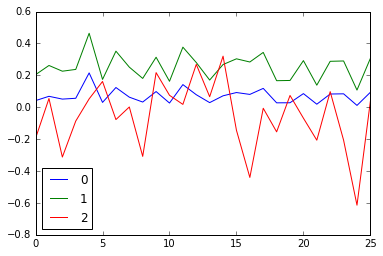

In [213]:
arousalPDF.plot()

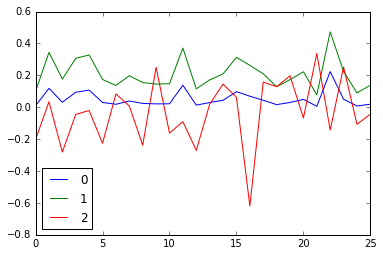

In [217]:
valencePDF.plot()

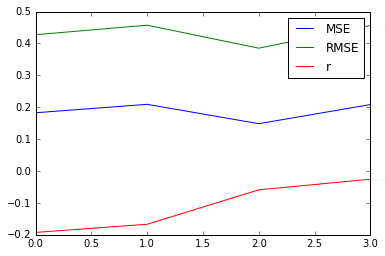

In [214]:
valenceResult.plot()

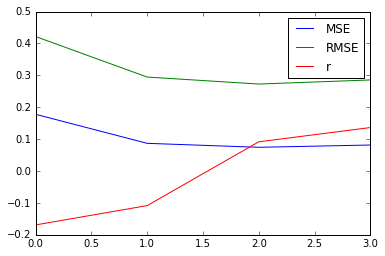

In [215]:
arousalResult.plot()

In [208]:
valenceResult.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSE,4.0,0.105210,0.048762,0.074426,0.079808,0.084230,0.109631,0.177953
RMSE,4.0,0.318758,0.069309,0.272810,0.282449,0.290189,0.326498,0.421844
r,4.0,-0.012355,0.149129,-0.169036,-0.123577,-0.008380,0.102841,0.136374


In [218]:
arousalResult.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSE,4.0,0.105210,0.048762,0.074426,0.079808,0.084230,0.109631,0.177953
RMSE,4.0,0.318758,0.069309,0.272810,0.282449,0.290189,0.326498,0.421844
r,4.0,-0.012355,0.149129,-0.169036,-0.123577,-0.008380,0.102841,0.136374


In [219]:
x = list(animovies.name.values)

In [220]:
x.remove(x[0])
x

['Elephant_s_Dream', 'Origami', 'Sintel']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3039, 9)
(3039,)
(1014, 9)
(1014,)


In [222]:
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.001)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_rbf)))
# compute the MSE of our predictions
print(metrics.mean_squared_error(y_test, y_rbf))
# compute Pearson r
r_row, p_value = pearsonr(y_test, y_rbf)
r_row , p_value

0.16963324273
0.0287754370393


(0.63933814966331681, 1.2819855416706702e-117)

svr_lin = SVR(kernel='linear', C=10)
y = svr_lin.fit(X_train, y_train).predict(X_test)
mse= mean_squared_error(y_test, y)
mse

In [349]:
from sklearn.model_selection import GridSearchCV
#parameters = {'kernel':('linear','rbf'),'C':[1, 10]}
#svr = svm.SVR()
grid_search = GridSearchCV(SVR(kernel='rbf'),
                           param_grid ={'C': [ 0.1, 1,5, 10, 100,1e3],
                                        'gamma': [0.0001,0.001, 0.1, 1, 10]
                                       })
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_) 

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [296]:
grid_search.fit(X2_train, y2_train)
print(grid_search.best_estimator_) 

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [350]:
svr_rbf_va = SVR(kernel='rbf', C=1, gamma=0.001)
vamodel = svr_rbf_va.fit(X_train, y_train)
y_rbf_va = vamodel.predict(X_test)
# compute the MSE of our predictions
print(metrics.mean_squared_error(y_test, y_rbf_va))

0.0512195924126


In [351]:
svr_rbf_ar = SVR(kernel='rbf', C=1, gamma=0.001)
armodel = svr_rbf_ar.fit(X2_train, y2_train)
y_rbf_ar = armodel.predict(X2_test)
# compute the MSE of our predictions
print(metrics.mean_squared_error(y2_test, y_rbf_ar))

0.0334810052342


In [352]:
tempar = armodel.predict(X)
tempval = vamodel.predict(X)

In [301]:
bokehPlotAV('SVR ',tempval,tempar)

In [360]:
def plotpredict(val,ar,pv,pa):
    plt.figure(figsize=(10,10))  

    plt.scatter(val,ar,color='b',label='groundtruth')
    plt.scatter(pv,pa,color='r',label='prediction')
    
    plt.grid()
    plt.legend(loc='lower center', shadow=True, fontsize='x-large')
    plt.title("Valence vs Arousal")
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel("valence")
    plt.ylabel("arousal")
    plt.show()

In [361]:
[len(i) for i in [V,A,tempval,tempar]]

[2642, 2642, 2639, 2639]

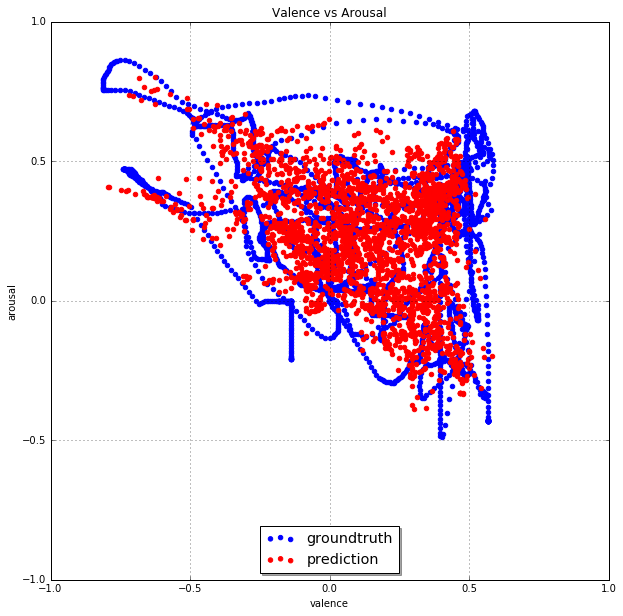

In [362]:
plotpredict(V,A,tempval,tempar)

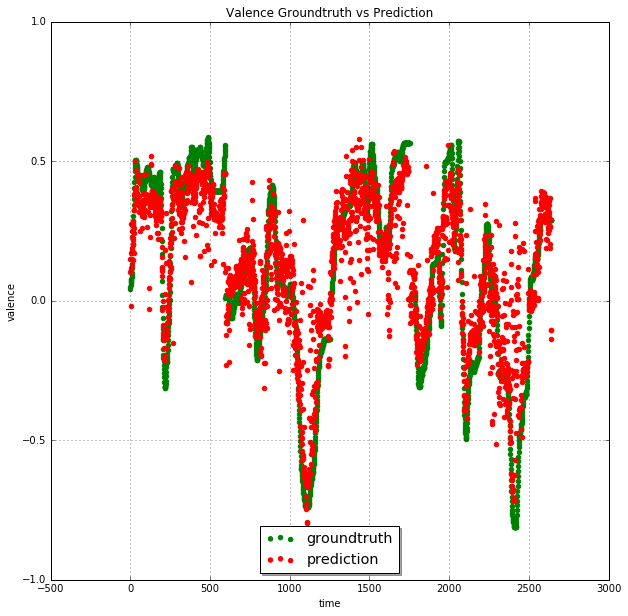

In [450]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(V)),V,color='g',label='groundtruth')
plt.scatter(range(len(tempval)),tempval,color='r',label='prediction')
plt.ylim([-1,1])
plt.grid()
plt.title("Valence Groundtruth vs Prediction")
plt.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.xlabel("time")
plt.ylabel("valence")

plt.savefig(pathlist+"valenceprediction.png")
plt.show()

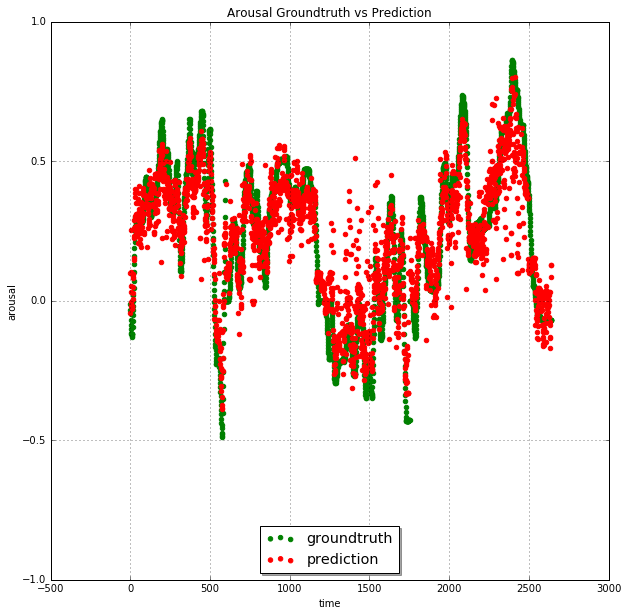

In [448]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(A)),A,color='g', label='groundtruth')
plt.scatter(range(len(tempar)),tempar,color='r', label='prediction')
plt.ylim([-1,1])
plt.grid()
plt.title("Arousal Groundtruth vs Prediction")
plt.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.xlabel("time")
plt.ylabel("arousal")
plt.savefig(pathlist+"arousalprediction.png")
plt.show()

In [ ]:
rows_list = []
for row in input_rows:

        dict1 = {}
        # get input row in dictionary format
        # key = col_name
        dict1.update(blah..) 

        rows_list.append(dict1)

df = pd.DataFrame(rows_list)               

